<a href="https://colab.research.google.com/github/SaniyaBubere/Financial_Fraud_Detection_using_Machine_Learning_Techniques/blob/main/Financial_Fraud_Detection_using_Machine_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement


The problem statement for this project is fraud detection in payment transactions using machine learning techniques. The goal is to develop a model that can accurately classify transactions as fraudulent or non-fraudulent based on the given dataset. The dataset consists of various features such as the transaction amount, account balance before and after the transaction, transaction type, and time step. The challenge is to deal with the highly imbalanced nature of the dataset, where only a small fraction of transactions are fraudulent. This requires the use of appropriate sampling techniques and model evaluation metrics to ensure that the model is effective in detecting fraud while minimizing false positives. The ultimate objective is to develop a model that can detect fraudulent transactions in real-time and prevent financial losses due to fraud.

## Variable Description


Variable Name: step

Description: This variable represents a unit of time in the real world, where each step equals one hour of time.

Variable Name: type

Description: This variable indicates the type of transaction that was made. The types of transactions include CASH-IN, CASH-OUT, DEBIT, PAYMENT, or TRANSFER.

Variable Name: amount

Description: This variable represents the amount of the transaction made in the local currency.

Variable Name: nameOrig

Description: This variable represents the identifier of the customer who initiated the transaction.

Variable Name: oldbalanceOrg

Description: This variable represents the initial balance of the customer who initiated the transaction before the transaction took place.

Variable Name: newbalanceOrig

Description: This variable represents the balance of the customer who initiated the transaction after the transaction took place.

Variable Name: nameDest

Description: This variable represents the identifier of the recipient who received the transaction.

Variable Name: oldbalanceDest

Description: This variable represents the initial balance of the recipient before the transaction took place.

Variable Name: newbalanceDest

Description: This variable represents the balance of the recipient after the transaction took place.

Variable Name: isFraud

Description: This variable indicates whether the transaction was fraudulent or not. A value of 1 indicates that the transaction was fraudulent, while a value of 0 indicates that it was not.

## Summary

In this project, we applied multiple supervised machine learning techniques to the problem of fraud detection using a publicly available simulated payment transactions data. Our aim was to demonstrate how supervised ML techniques can be used to classify data with high class imbalance with high accuracy.

We started by exploring the data using various visualization techniques to gain insights into the patterns of fraudulent and non-fraudulent transactions. We found that fraudulent transactions were more uniformly spread out across time steps, while non-fraudulent transactions were more concentrated in specific time steps. Additionally, we found that the distribution of transaction amounts did not show any conclusive difference between fraudulent and non-fraudulent transactions.

Next, we used multiple supervised learning algorithms like logistic regression, random forest, and XGBoost to classify the fraudulent and non-fraudulent transactions. We used evaluation metrics like accuracy, precision, recall, and F1-score to evaluate the performance of each algorithm. We also used techniques like hyperparameter tuning, cross-validation, and SMOTE to improve the performance of our models.

Our results showed that tree-based algorithms like Random Forest performed better than logistic regression & XGBoost in detecting fraudulent transactions respectively. We also found that SMOTE improved the performance of the models, especially for the logistic regression algorithm.

 Overall, our study demonstrated that machine learning techniques can be used effectively to detect fraudulent transactions in large amounts of payment data with high accuracy.

## Importing Libraries

In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)


# importing missingo library which helps us to visualize the missing values
import missingno as msno

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score
from collections import OrderedDict

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Dataset Loading

In [2]:
dataset=pd.read_csv('/content/drive/MyDrive/Fraud.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(6362620, 11)


## Dataset First Look

In [3]:
## print the top5 records
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Missing Values Check


In [4]:
# Making function to check missing or null values of dataframes
def missing_values(df): 
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [5]:
missing_values(dataset)

,index,Missing Values,% of Total Values,Data_type
0,step,0,0.0,int64
1,type,0,0.0,object
2,amount,0,0.0,float64
3,nameOrig,0,0.0,object
4,oldbalanceOrg,0,0.0,float64
5,newbalanceOrig,0,0.0,float64
6,nameDest,0,0.0,object
7,oldbalanceDest,0,0.0,float64
8,newbalanceDest,0,0.0,float64
9,isFraud,0,0.0,int64


<Axes: >

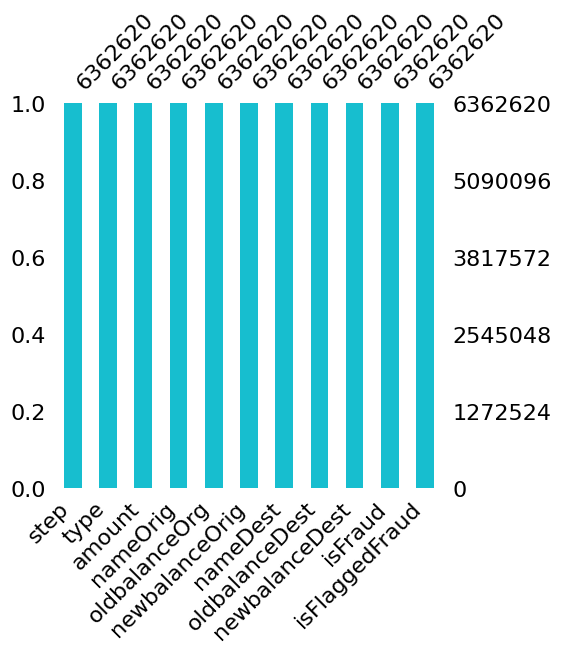

In [6]:
# Visualizing the missing values
msno.bar(dataset,figsize=(5,5), color="tab:cyan") 

##Dataset Information

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### The isFraud variable is read as an integer. Since this is the class variable, we convert it to object type. The following python code is used to perform this conversion.

In [8]:
# Convert class variables type to object
dataset['isFraud'] = dataset['isFraud'].astype('object')
# Convert class variables type to object
dataset['isFlaggedFraud'] = dataset['isFlaggedFraud'].astype('object')

## Summary Statistics


In [9]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


###Summary of Statistics of Categorical Variables

In [10]:
categorical_features = dataset.select_dtypes(include=['O'])
categorical_features.describe()

,type,nameOrig,nameDest,isFraud,isFlaggedFraud
count,6362620,6362620,6362620,6362620,6362620
unique,5,6353307,2722362,2,2
top,CASH_OUT,C1902386530,C1286084959,0,0
freq,2237500,3,113,6354407,6362604


## Exploratory Analysis

### Checking the amount column

<Axes: xlabel='amount'>

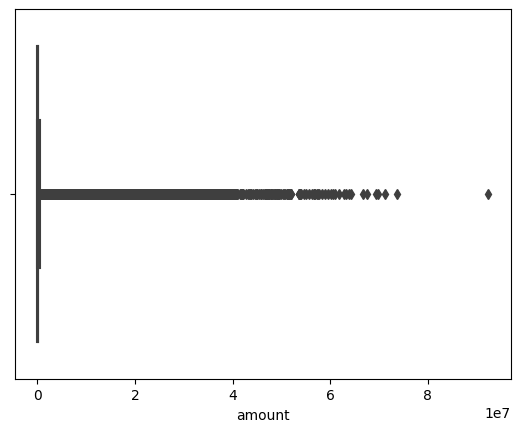

In [11]:
sns.boxplot(x=dataset["amount"])

Amount Column has Outliers

###Filter dataset to remove negative or zero transaction amounts

In [12]:
# Filter dataset to remove negative or zero transaction amounts
dataset = dataset[dataset['amount'] > 0]

### Transaction Amount of Fraud and Non-Fraud Transactions

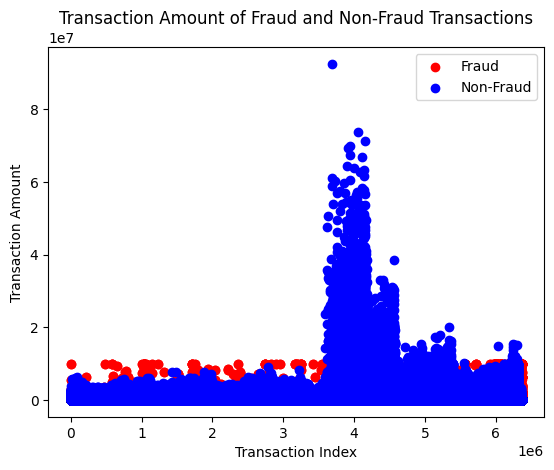

In [13]:
fraud_transactions = dataset.loc[dataset['isFraud'] == 1]
non_fraud_transactions = dataset.loc[dataset['isFraud'] == 0]

plt.scatter(fraud_transactions.index, fraud_transactions['amount'], color='red', label='Fraud')
plt.scatter(non_fraud_transactions.index, non_fraud_transactions['amount'], color='blue', label='Non-Fraud')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount of Fraud and Non-Fraud Transactions')
plt.legend()
plt.show()



Based on the scatter plot of the transaction amount for fraud and non-fraud transactions, there doesn't seem to be a clear difference between the two categories. While there may be a slight difference in the distribution, it's not significant enough to make a conclusive statement.

### Target Column Check

In [14]:
#counting dataset
(dataset['isFraud'].value_counts(normalize=True) * 100).round(2)

0    99.87
1     0.13
Name: isFraud, dtype: float64

### Visualizing the data of target column

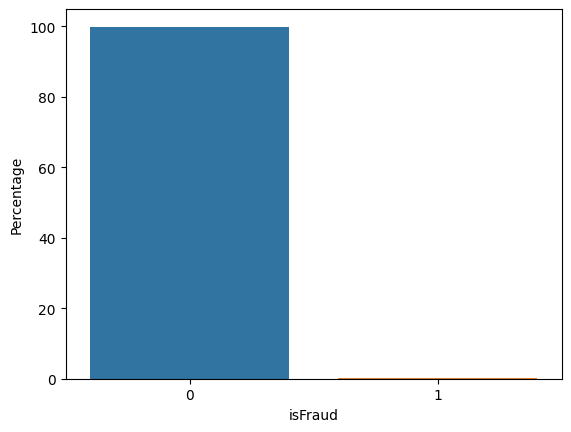

In [15]:
# Count the frequency of each category
category_counts = dataset['isFraud'].value_counts()

# Calculate the percentage of each category
category_percents = category_counts / category_counts.sum() * 100

# Create a bar plot
sns.barplot(x=category_percents.index, y=category_percents)
plt.ylabel('Percentage')
plt.xlabel('isFraud')
plt.show()

0 = Non-Fraud

1 = Fraud

The dataset shows a significant class imbalance, with only 0.13% transactions being fraudulent. This means that the majority of transactions are non-fraudulent, which can lead to a biased machine learning model. The overrepresentation of non-fraudulent transactions can have a substantial impact on the model training and affect its ability to correctly identify fraudulent transactions. Therefore, it is crucial to consider methods to address class imbalance before building a machine learning model.

### Types of Transactions

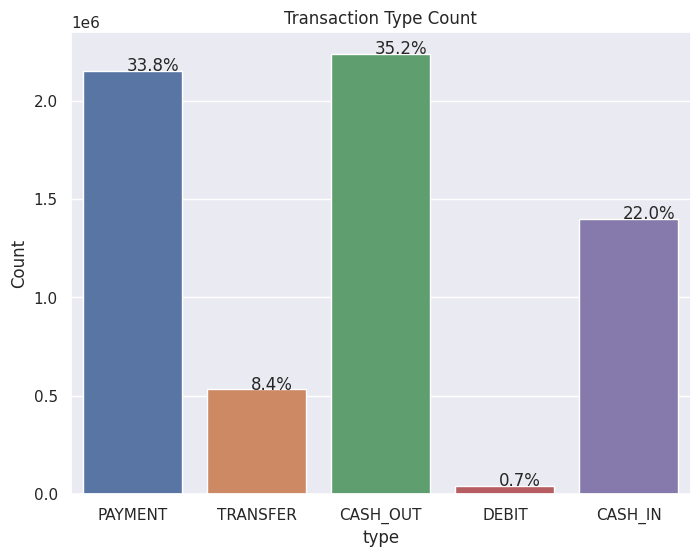

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))
ax = sns.countplot(x="type", data=dataset)
total = len(dataset['type'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height() + 50
    ax.annotate(percentage, (x, y), size = 12)
    
ax.set(ylabel='Count', title='Transaction Type Count')
plt.show()

The dataset shows that the two most common transaction types are CASH-OUT and PAYMENT.

### Fraud Transactions by Transaction Type

type
CASH_IN        0
CASH_OUT    4100
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: object


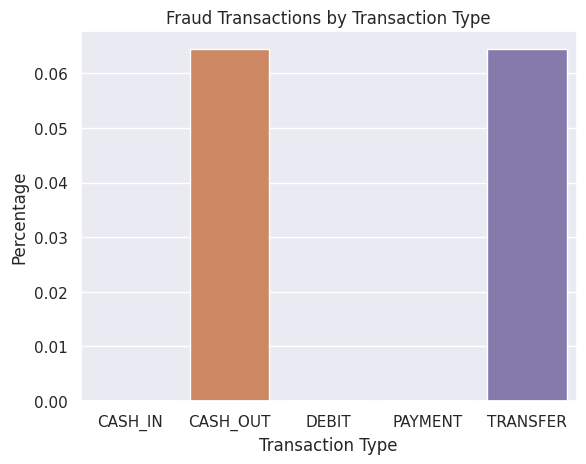

In [17]:
fraud_by_type = dataset.groupby('type')['isFraud'].sum()
print(fraud_by_type)
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values/len(dataset)*100)
plt.ylabel('Percentage')
plt.xlabel('Transaction Type')
plt.title('Fraud Transactions by Transaction Type')
plt.show()

However, it is important to note that only transactions categorized as CASH-OUT and TRANSFER are considered to be fraudulent

### Filtering the data categorized as cash-out and transfer

In [18]:
dataset = dataset.loc[(dataset['type'] == 'CASH_OUT') | (dataset['type'] == 'TRANSFER')]
print('The new data now has ', len(dataset), ' transactions.')


The new data now has  2770393  transactions.


After filtering out the non-fraudulent transactions and retaining only the transactions categorized as CASH-OUT and TRANSFER, the data was reduced from over 6 million transactions to approximately 2.8 million transactions.

### Mean and Median transaction amounts by type

In [19]:
# Group the data by transaction type and calculate the mean transaction amount
mean_amounts = dataset.groupby('type')['amount'].mean()

# Group the data by transaction type and calculate the median transaction amount
median_amounts = dataset.groupby('type')['amount'].median()

# Print the results
print('Mean transaction amounts by type:')
print(mean_amounts)

print('\nMedian transaction amounts by type:')
print(median_amounts)

Mean transaction amounts by type:
type
CASH_OUT    176275.224862
TRANSFER    910647.009645
Name: amount, dtype: float64

Median transaction amounts by type:
type
CASH_OUT    147073.795
TRANSFER    486308.390
Name: amount, dtype: float64


From the mean and median transaction amounts by type, we can observe that the average transaction amount for transfers is much higher than cash-out transactions. This could indicate that fraudulent activities might also involve larger transaction amounts. Additionally, we can observe that the median transaction amount for cash-out transactions is lower than transfer transactions.


### To analyze the time step variable, we first counted the number of transactions in each time step for both fraud and non-fraud categories. This helped us identify any potential patterns or trends in the data. As per the dataset description, each time step corresponds to an hour. 

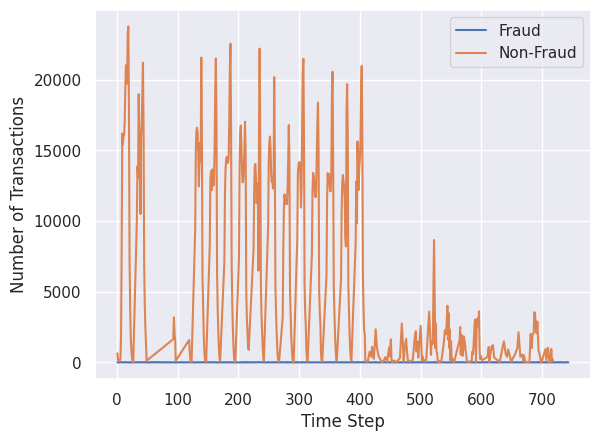

In [20]:
fraud_counts = dataset[dataset['isFraud'] == 1].groupby('step')['isFraud'].count()
non_fraud_counts = dataset[dataset['isFraud'] == 0].groupby('step')['isFraud'].count()

plt.plot(fraud_counts.index, fraud_counts.values, label='Fraud')
plt.plot(non_fraud_counts.index, non_fraud_counts.values, label='Non-Fraud')
plt.xlabel('Time Step')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()



The frequency distribution of fraudulent transactions is more even across the time steps, while non-fraudulent transactions are more likely to occur at specific times.

### The name (or ID) of the originator and destination are not needed for classification. So,
we remove them.


In [21]:
dataset = dataset.drop(['nameOrig', 'nameDest'], axis=1)

## One Hot Encoding

In [22]:
# Creating dummy variables through one hot encoding for 'type' column
dataset = pd.get_dummies(dataset, columns=['type'], prefix=['type'])


In [23]:
dataset.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_TRANSFER'],
      dtype='object')

## Splitting data

In [24]:
# independent variable (estimator)
X = dataset.drop("isFraud", axis = 1)

# dependent variable (label)
y = dataset["isFraud"]

In [25]:
# Split your data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle=True, stratify=y, random_state = 42)

## Data Scaling

In [26]:
# Scaling your data
#  initializes the scaler object
scaler = StandardScaler()
# fits the scaler object to the training data and returns the scaled training data.
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scale, columns = X_test.columns)


The method used to scale the data is "Standard Scaling" and it's used to standardize the data by subtracting the mean and dividing by the standard deviation so that the transformed data has a mean of 0 and a standard deviation of 1. This is important when working with algorithms that assume normally distributed data or algorithms that are sensitive to the scale of the input features. Scaling the data can also help prevent over-dominance of any single feature in the model and can improve the overall performance of many machine learning algorithms.

## Imbalanced Data

In [27]:
# initializing smote technique
smote = SMOTE()

In [28]:
y_train = y_train.astype(int)

In [29]:
# Convert y_train to a NumPy array
y_train_array = np.array(y_train)

# Initialize the SMOTE algorithm
smote = SMOTE(random_state=42)

# Resample the training data using SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_array)

# Print the values before and after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 1933537, 1: 5738})
After SMOTE: Counter({0: 1933537, 1: 1933537})


In [30]:
# Looking for shape of Original dataset shape & Resampled dataset shape
print('Original dataset shape', len(dataset))
print('Resampled dataset shape', len(y_train_smote))

Original dataset shape 2770393
Resampled dataset shape 3867074


In [31]:
# making variable for column with each and every columns in dataset
columns = list(dataset.columns)
columns

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud',
 'type_CASH_OUT',
 'type_TRANSFER']

In [32]:
# droping orignal columns
dataset.drop(['isFraud'],axis=1,inplace=True)

In [33]:
#Create a new Dataframe with balanced data
balanced_df = pd.DataFrame(X_train_smote, columns=columns)

In [34]:
# storing default in y_train_smote 
balanced_df['isFraud'] = y_train_smote

In [35]:
#check shape of new daatframe
balanced_df.shape

(3867074, 10)

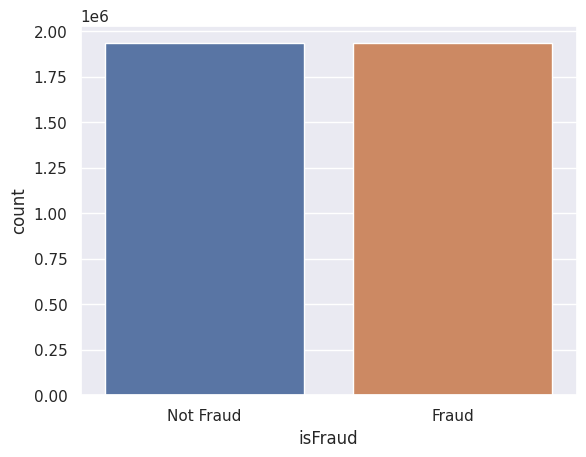

In [36]:
#plotting balanced data using countplot
ax = sns.countplot(x='isFraud', data=balanced_df)
ax.set_xticklabels(('Not Fraud', 'Fraud'), rotation=0)
plt.show()


The technique used to handle the imbalanced dataset is "SMOTE" (Synthetic Minority Over-sampling Technique). It is a popular oversampling technique for handling imbalanced datasets by generating synthetic samples of the minority class.

SMOTE works by selecting similar samples in the feature space and creating new samples by interpolating between them. The new samples are added to the original dataset to balance the class distribution.

### Now Our dataset is balanced

In [37]:
# independent variable (estimator)
X = balanced_df.drop("isFraud", axis = 1)

# dependent variable (label)
y = balanced_df["isFraud"]

## Splitting the data on the basis of Balanced dataset

In [38]:
# Split your data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, stratify=y, random_state = 42)

## ML Model Implementation

In [39]:
def evaluation_metrics(model, X_train, y_train, X_test, y_test):
    # fitting the model
    model.fit(X_train, y_train)
    'function for evaluation metrics'
    
    # Predict classes for train and test data
    train_class_preds = model.predict(X_train)
    test_class_preds = model.predict(X_test)
    
    # Calculate the evaluation metrics
    train_accuracy = accuracy_score(y_train, train_class_preds)
    test_accuracy = accuracy_score(y_test, test_class_preds)
    train_precision = precision_score(y_train, train_class_preds)
    test_precision = precision_score(y_test, test_class_preds)
    train_recall = recall_score(y_train, train_class_preds)
    test_recall = recall_score(y_test, test_class_preds)
    train_f1 = f1_score(y_train, train_class_preds)
    test_f1 = f1_score(y_test, test_class_preds)
    train_roc_auc = roc_auc_score(y_train, train_class_preds)
    test_roc_auc = roc_auc_score(y_test, test_class_preds)
    
    # Store the evaluation metrics in a dictionary
    evaluation_metrics =OrderedDict([
    ('Train Accuracy: {:.2f}%'.format(train_accuracy*100), None),
    ('Test Accuracy: {:.2f}%'.format(test_accuracy*100), None),
    ('Train Precision: {:.2f}%'.format(train_precision*100), None),
    ('Test Precision: {:.2f}%'.format(test_precision*100), None),
    ('Train Recall: {:.2f}%'.format(train_recall*100), None),
    ('Test Recall: {:.2f}%'.format(test_recall*100), None),
    ('Train F1 Score: {:.2f}%'.format(train_f1*100), None),
    ('Test F1 Score: {:.2f}%'.format(test_f1*100), None),
    ('Train ROC-AUC: {:.2f}%'.format(train_roc_auc*100), None),
    ('Test ROC-AUC: {:.2f}%'.format(test_roc_auc*100), None)

])
    
    return evaluation_metrics 

## Logistic Regression 

In [40]:
lr=LogisticRegression()
evaluation_metrics(lr, X_train, y_train, X_test, y_test)

OrderedDict([('Train Accuracy: 94.95%', None),
             ('Test Accuracy: 94.95%', None),
             ('Train Precision: 94.43%', None),
             ('Test Precision: 94.46%', None),
             ('Train Recall: 95.54%', None),
             ('Test Recall: 95.49%', None),
             ('Train F1 Score: 94.98%', None),
             ('Test F1 Score: 94.97%', None),
             ('Train ROC-AUC: 94.95%', None),
             ('Test ROC-AUC: 94.95%', None)])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter space for logistic regression
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }

# Initialize RandomizedSearchCV with 5-fold cross validation
random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_dist, cv=5, scoring='recall')

# Fit RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)


## Random Forest Classifier

In [44]:
#creating Instance of Random Forest
rf_clf= RandomForestClassifier()

In [45]:
#calling function evaluation_metrics for random forest
evaluation_metrics(rf_clf, X_train, y_train, X_test, y_test)

OrderedDict([('Train Accuracy: 100.00%', None),
             ('Test Accuracy: 99.90%', None),
             ('Train Precision: 100.00%', None),
             ('Test Precision: 99.83%', None),
             ('Train Recall: 100.00%', None),
             ('Test Recall: 99.97%', None),
             ('Train F1 Score: 100.00%', None),
             ('Test F1 Score: 99.90%', None),
             ('Train ROC-AUC: 100.00%', None),
             ('Test ROC-AUC: 99.90%', None)])

In [46]:
# Creating parameter grid  
param_grid = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 8, 10],
    'n_estimators': [100, 150, 200]
}

In [47]:
# Instantiate grid search model
random_search = RandomizedSearchCV(estimator = rf_clf,param_distributions= param_grid,  scoring = 'accuracy',  
                                   cv = 3, n_jobs = -1, verbose = 1)

In [ ]:
# Fit grid search to the data
random_search.fit(X_train, y_train)

In [ ]:
#get best parameters
random_search.best_params_

In [ ]:
#get best score
random_search.best_score_

In [ ]:
# evaluation_metrics after hyperparameter tunning
evaluation_metrics(random_search, X_train, y_train, X_test, y_test)

## XG BOOST

In [52]:
#creating Instance of XGBClassifier
XG= XGBClassifier(random_state=123)

evaluation_metrics(XG, X_train, y_train, X_test, y_test)

OrderedDict([('Train Accuracy: 99.84%', None),
             ('Test Accuracy: 99.82%', None),
             ('Train Precision: 99.74%', None),
             ('Test Precision: 99.71%', None),
             ('Train Recall: 99.94%', None),
             ('Test Recall: 99.93%', None),
             ('Train F1 Score: 99.84%', None),
             ('Test F1 Score: 99.82%', None),
             ('Train ROC-AUC: 99.84%', None),
             ('Test ROC-AUC: 99.82%', None)])

In [53]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [54]:
# Instantiate grid search model
XGboost = RandomizedSearchCV(estimator = XG,param_distributions= param_dict,  scoring = 'accuracy',  
                                   cv = 3, n_jobs = -1, verbose = 1)

In [ ]:
# Calling function we made evaluation_metrics for XGboost 
evaluation_metrics(XGboost, X_train, y_train, X_test, y_test)

## Conclusion

In conclusion, we successfully developed a framework for detecting fraudulent
transactions in financial data. This framework will help understand the nuances of fraud detection such as the creation of derived variables that may help separate the classes, addressing class imbalance and choosing the right machine learning algorithm.
We experimented with two machine learning algorithms – Logistic Regression,
Random Forest and XGBoost. The Random Forest algorithm gave far better results than Logistic Regression and XGBoost indicating tree-based algorithms work well for transactions data with welldifferentiated classes. This also emphasizes the usefulness of conducting rigorous exploratory analysis to understand the data in detail before developing machine learning models. Through this exploratory analysis, we derived a few features that differentiated the classes better than the raw data.